## MAC Book Review Analysis

In [2]:
import pandas as pd
import numpy as np
import re
import string
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_excel(r"C:\Users\bmsha\Documents\NLP\macbook m1.xlsx")

In [6]:
df.head()

,Asin,Title,Content,Verified Purchase,Model,Rating,Helpful,Images,Images URL,Videos,Videos URL,Reviews URL,Author,Avatar URL,Author Homepage,Nation,Date
0,B08N5W4NNB,Value for your buck,Most value for money laptop right now ... amaz...,Y,Colour: Space GreySize: 256 GB,5.0,0.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/R1CT...,gour,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-18
1,B08N5W4NNB,The best laptop for Business,The best laptop 💻 for Office and professional ...,N,Colour: Space GreySize: 256 GB,5.0,0.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/R3CS...,Murlimohan Bura,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-18
2,B08N5T6CZ6,When you spend too much money advertising rath...,Looks and worked great for the 1st year. But j...,N,Colour: SilverSize: 256 GB,1.0,0.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/RB1M...,Arnab,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-15
3,B08N5W4NNB,Value for Money Product,NaN,Y,Colour: Space GreySize: 256 GB,5.0,1.0,2,https://m.media-amazon.com/images/I/71Sd3tCZAS...,0,NaN,https://www.amazon.in/gp/customer-reviews/R1YP...,Labhansh Satpute,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-13
4,B08N5T6CZ6,Nice,Nice,Y,Colour: SilverSize: 256 GB,5.0,1.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/RZV5...,LEENUS,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-05


In [8]:
df=df[['Title','Content']]

In [9]:
df

,Title,Content
0,Value for your buck,Most value for money laptop right now ... amaz...
1,The best laptop for Business,The best laptop 💻 for Office and professional ...
2,When you spend too much money advertising rath...,Looks and worked great for the 1st year. But j...
3,Value for Money Product,NaN
4,Nice,Nice
...,...,...
751,Eureka!,Excellent machine 👌🏻💻. Only ram is of DDR3 ty...
752,the world’s fastest CPU core in low-power silicon,M1 has the fastest CPU have ever made.The long...
753,Super excited,If we could get it for around 70-75k with some...
754,4k display!!,Really awesome and it has a 4k display which w...


In [11]:
df[df.duplicated()]

,Title,Content
462,Good product,Good product
498,Good,Good
669,Good,Good


In [12]:
df.isna().sum()

Title       0
Content    25
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    756 non-null    object
 1   Content  731 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [14]:
df=df.dropna().reset_index(drop=True)

In [15]:
df=df.drop_duplicates().reset_index(drop=True)

In [16]:
df['Review']=df['Title']+" "+df['Content']

In [17]:
df

,Title,Content,Review
0,Value for your buck,Most value for money laptop right now ... amaz...,Value for your buck Most value for money lapto...
1,The best laptop for Business,The best laptop 💻 for Office and professional ...,The best laptop for Business The best laptop 💻...
2,When you spend too much money advertising rath...,Looks and worked great for the 1st year. But j...,When you spend too much money advertising rath...
3,Nice,Nice,Nice Nice
4,Gets hanged often,Don’t understand why many applications get han...,Gets hanged often Don’t understand why many ap...
...,...,...,...
723,Eureka!,Excellent machine 👌🏻💻. Only ram is of DDR3 ty...,Eureka! Excellent machine 👌🏻💻. Only ram is of...
724,the world’s fastest CPU core in low-power silicon,M1 has the fastest CPU have ever made.The long...,the world’s fastest CPU core in low-power sili...
725,Super excited,If we could get it for around 70-75k with some...,Super excited If we could get it for around 70...
726,4k display!!,Really awesome and it has a 4k display which w...,4k display!! Really awesome and it has a 4k di...


In [19]:
df=df[['Review']]
df

,Review
0,Value for your buck Most value for money lapto...
1,The best laptop for Business The best laptop 💻...
2,When you spend too much money advertising rath...
3,Nice Nice
4,Gets hanged often Don’t understand why many ap...
...,...
723,Eureka! Excellent machine 👌🏻💻. Only ram is of...
724,the world’s fastest CPU core in low-power sili...
725,Super excited If we could get it for around 70...
726,4k display!! Really awesome and it has a 4k di...


## TEXT PROCESSING

In [22]:
df['Review']=df['Review'].str.lower()

In [23]:
df

,Review
0,value for your buck most value for money lapto...
1,the best laptop for business the best laptop 💻...
2,when you spend too much money advertising rath...
3,nice nice
4,gets hanged often don’t understand why many ap...
...,...
723,eureka! excellent machine 👌🏻💻. only ram is of...
724,the world’s fastest cpu core in low-power sili...
725,super excited if we could get it for around 70...
726,4k display!! really awesome and it has a 4k di...


In [24]:
df['Review']=df['Review'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+',"",x))

,Review
0,value for your buck most value for money lapto...
1,the best laptop for business the best laptop 💻...
2,when you spend too much money advertising rath...
3,nice nice
4,gets hanged often don’t understand why many ap...
...,...
723,eureka! excellent machine 👌🏻💻. only ram is of...
724,the world’s fastest cpu core in low-power sili...
725,super excited if we could get it for around 70...
726,4k display!! really awesome and it has a 4k di...


In [26]:
df['Review']=df['Review'].apply(lambda x:re.sub(r'\d+',"",x))

In [27]:
df["Review"]=df["Review"].apply(lambda x:
                                    x.translate(str.maketrans('','',string.punctuation)))

In [28]:
import spacy

In [29]:
nlp=spacy.load('en_core_web_sm')

In [33]:
df['doc']=df['Review'].apply(lambda x:nlp(x))

In [34]:
df

,Review,doc
0,value for your buck most value for money lapto...,"(value, for, your, buck, most, value, for, mon..."
1,the best laptop for business the best laptop 💻...,"(the, best, laptop, for, business, the, best, ..."
2,when you spend too much money advertising rath...,"(when, you, spend, too, much, money, advertisi..."
3,nice nice,"(nice, nice)"
4,gets hanged often don’t understand why many ap...,"(gets, hanged, often, do, n’t, understand, why..."
...,...,...
723,eureka excellent machine 👌🏻💻 only ram is of d...,"(eureka, excellent, machine, 👌, 🏻, 💻, , only,..."
724,the world’s fastest cpu core in lowpower silic...,"(the, world, ’s, fastest, cpu, core, in, lowpo..."
725,super excited if we could get it for around k ...,"(super, excited, if, we, could, get, it, for, ..."
726,k display really awesome and it has a k displa...,"(k, display, really, awesome, and, it, has, a,..."


In [35]:
df['Lemmas']=df['doc'].apply(lambda doc:[token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])

In [36]:
df

,Review,doc,Lemmas
0,value for your buck most value for money lapto...,"(value, for, your, buck, most, value, for, mon...","[value, buck, value, money, laptop, right, ama..."
1,the best laptop for business the best laptop 💻...,"(the, best, laptop, for, business, the, best, ...","[good, laptop, business, good, laptop, office,..."
2,when you spend too much money advertising rath...,"(when, you, spend, too, much, money, advertisi...","[spend, money, advertising, test, product, loo..."
3,nice nice,"(nice, nice)","[nice, nice]"
4,gets hanged often don’t understand why many ap...,"(gets, hanged, often, do, n’t, understand, why...","[get, hang, understand, application, hang, for..."
...,...,...,...
723,eureka excellent machine 👌🏻💻 only ram is of d...,"(eureka, excellent, machine, 👌, 🏻, 💻, , only,...","[eureka, excellent, machine, ram, ddr, type, p..."
724,the world’s fastest cpu core in lowpower silic...,"(the, world, ’s, fastest, cpu, core, in, lowpo...","[world, fast, cpu, core, lowpower, silicon, m,..."
725,super excited if we could get it for around k ...,"(super, excited, if, we, could, get, it, for, ...","[super, excited, k, kind, discount, b, huge, a..."
726,k display really awesome and it has a k displa...,"(k, display, really, awesome, and, it, has, a,...","[k, display, awesome, k, display, writtenhones..."


In [37]:
!pip install TextBlob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.8 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.7 MB/s  0:00:00

  Attempting uninstall: nltk

    Found existing installation: nltk 3.8.1

   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
    Uninstalling nltk-3.8.1:
   ---------------------------------------- 0/2 [nltk]
      Successfully uninstalled nltk-3.8.1
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from textblob import TextBlob

In [41]:
df['Sentiment_score']=df['Lemmas'].apply(lambda x: TextBlob(" ".join(x)).sentiment.polarity if isinstance(x, list) else None)

In [42]:
df

,Review,doc,Lemmas,Sentiment_score
0,value for your buck most value for money lapto...,"(value, for, your, buck, most, value, for, mon...","[value, buck, value, money, laptop, right, ama...",0.528571
1,the best laptop for business the best laptop 💻...,"(the, best, laptop, for, business, the, best, ...","[good, laptop, business, good, laptop, office,...",0.475000
2,when you spend too much money advertising rath...,"(when, you, spend, too, much, money, advertisi...","[spend, money, advertising, test, product, loo...",0.233333
3,nice nice,"(nice, nice)","[nice, nice]",0.600000
4,gets hanged often don’t understand why many ap...,"(gets, hanged, often, do, n’t, understand, why...","[get, hang, understand, application, hang, for...",-0.600000
...,...,...,...,...
723,eureka excellent machine 👌🏻💻 only ram is of d...,"(eureka, excellent, machine, 👌, 🏻, 💻, , only,...","[eureka, excellent, machine, ram, ddr, type, p...",0.604762
724,the world’s fastest cpu core in lowpower silic...,"(the, world, ’s, fastest, cpu, core, in, lowpo...","[world, fast, cpu, core, lowpower, silicon, m,...",0.145000
725,super excited if we could get it for around k ...,"(super, excited, if, we, could, get, it, for, ...","[super, excited, k, kind, discount, b, huge, a...",0.402778
726,k display really awesome and it has a k displa...,"(k, display, really, awesome, and, it, has, a,...","[k, display, awesome, k, display, writtenhones...",1.000000


In [44]:
df['Sentiment_score']=df['Sentiment_score'].apply(lambda x:'Positive' if x>0 else('negative' if x<0 else 'Neutral'))

In [45]:
df

,Review,doc,Lemmas,Sentiment_score
0,value for your buck most value for money lapto...,"(value, for, your, buck, most, value, for, mon...","[value, buck, value, money, laptop, right, ama...",Positive
1,the best laptop for business the best laptop 💻...,"(the, best, laptop, for, business, the, best, ...","[good, laptop, business, good, laptop, office,...",Positive
2,when you spend too much money advertising rath...,"(when, you, spend, too, much, money, advertisi...","[spend, money, advertising, test, product, loo...",Positive
3,nice nice,"(nice, nice)","[nice, nice]",Positive
4,gets hanged often don’t understand why many ap...,"(gets, hanged, often, do, n’t, understand, why...","[get, hang, understand, application, hang, for...",negative
...,...,...,...,...
723,eureka excellent machine 👌🏻💻 only ram is of d...,"(eureka, excellent, machine, 👌, 🏻, 💻, , only,...","[eureka, excellent, machine, ram, ddr, type, p...",Positive
724,the world’s fastest cpu core in lowpower silic...,"(the, world, ’s, fastest, cpu, core, in, lowpo...","[world, fast, cpu, core, lowpower, silicon, m,...",Positive
725,super excited if we could get it for around k ...,"(super, excited, if, we, could, get, it, for, ...","[super, excited, k, kind, discount, b, huge, a...",Positive
726,k display really awesome and it has a k displa...,"(k, display, really, awesome, and, it, has, a,...","[k, display, awesome, k, display, writtenhones...",Positive


In [46]:
df.Sentiment_score.value_counts()

Sentiment_score
Positive    611
negative     72
Neutral      45
Name: count, dtype: int64

## Model Building

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [48]:
df['Sentiment']=df['Sentiment_score'].map({'Positive':1,'negative':-1,'Neutral':0})

In [50]:
df.head()

,Review,doc,Lemmas,Sentiment_score,Sentiment
0,value for your buck most value for money lapto...,"(value, for, your, buck, most, value, for, mon...","[value, buck, value, money, laptop, right, ama...",Positive,1
1,the best laptop for business the best laptop 💻...,"(the, best, laptop, for, business, the, best, ...","[good, laptop, business, good, laptop, office,...",Positive,1
2,when you spend too much money advertising rath...,"(when, you, spend, too, much, money, advertisi...","[spend, money, advertising, test, product, loo...",Positive,1
3,nice nice,"(nice, nice)","[nice, nice]",Positive,1
4,gets hanged often don’t understand why many ap...,"(gets, hanged, often, do, n’t, understand, why...","[get, hang, understand, application, hang, for...",negative,-1


In [51]:
df['final']=df['Lemmas'].apply(lambda x:' '.join(x))

In [52]:
df

,Review,doc,Lemmas,Sentiment_score,Sentiment,final
0,value for your buck most value for money lapto...,"(value, for, your, buck, most, value, for, mon...","[value, buck, value, money, laptop, right, ama...",Positive,1,value buck value money laptop right amazing pe...
1,the best laptop for business the best laptop 💻...,"(the, best, laptop, for, business, the, best, ...","[good, laptop, business, good, laptop, office,...",Positive,1,good laptop business good laptop office profes...
2,when you spend too much money advertising rath...,"(when, you, spend, too, much, money, advertisi...","[spend, money, advertising, test, product, loo...",Positive,1,spend money advertising test product look work...
3,nice nice,"(nice, nice)","[nice, nice]",Positive,1,nice nice
4,gets hanged often don’t understand why many ap...,"(gets, hanged, often, do, n’t, understand, why...","[get, hang, understand, application, hang, for...",negative,-1,get hang understand application hang force qui...
...,...,...,...,...,...,...
723,eureka excellent machine 👌🏻💻 only ram is of d...,"(eureka, excellent, machine, 👌, 🏻, 💻, , only,...","[eureka, excellent, machine, ram, ddr, type, p...",Positive,1,eureka excellent machine ram ddr type processo...
724,the world’s fastest cpu core in lowpower silic...,"(the, world, ’s, fastest, cpu, core, in, lowpo...","[world, fast, cpu, core, lowpower, silicon, m,...",Positive,1,world fast cpu core lowpower silicon m fast cp...
725,super excited if we could get it for around k ...,"(super, excited, if, we, could, get, it, for, ...","[super, excited, k, kind, discount, b, huge, a...",Positive,1,super excited k kind discount b huge anyways s...
726,k display really awesome and it has a k displa...,"(k, display, really, awesome, and, it, has, a,...","[k, display, awesome, k, display, writtenhones...",Positive,1,k display awesome k display writtenhonestly aw...


In [56]:
vectorizer=TfidfVectorizer(max_features=2000)
X=vectorizer.fit_transform(df['final']).toarray()
y=df['Sentiment']

In [57]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
y

0      1
1      1
2      1
3      1
4     -1
      ..
723    1
724    1
725    1
726    1
727    1
Name: Sentiment, Length: 728, dtype: int64

In [59]:
df['Sentiment_score'].value_counts()

Sentiment_score
Positive    611
negative     72
Neutral      45
Name: count, dtype: int64

> Class Imbalance

In [60]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_res, y_res=smote.fit_resample(X, y)

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(X_res,y_res,random_state=42,test_size=0.2)

In [63]:
lg=LogisticRegression(max_iter=1000)
lg.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [64]:
ypred=lg.predict(xtest)

In [65]:
print("Accuracy:", accuracy_score(ytest, ypred))
print("\nClassification Report:\n", classification_report(ytest, ypred))

Accuracy: 0.9727520435967303

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.99      0.98       121
           0       0.96      1.00      0.98       124
           1       1.00      0.93      0.96       122

    accuracy                           0.97       367
   macro avg       0.97      0.97      0.97       367
weighted avg       0.97      0.97      0.97       367



In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

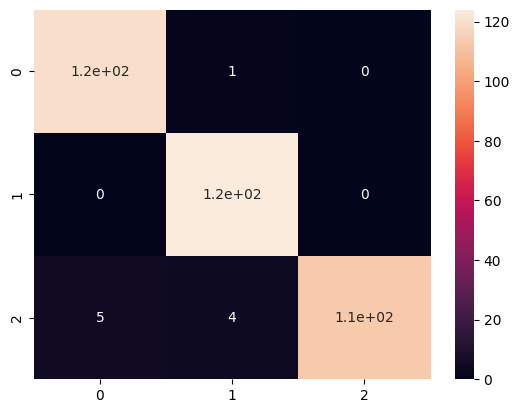

In [70]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [71]:
mn=MultinomialNB()
mn.fit(xtrain,ytrain)

MultinomialNB()

In [72]:
ypred1=mn.predict(xtest)

In [73]:
print("Accuracy:", accuracy_score(ytest, ypred1))
print("\nClassification Report:\n", classification_report(ytest, ypred1))

Accuracy: 0.9700272479564033

Classification Report:
               precision    recall  f1-score   support

          -1       0.93      1.00      0.96       121
           0       0.98      1.00      0.99       124
           1       1.00      0.91      0.95       122

    accuracy                           0.97       367
   macro avg       0.97      0.97      0.97       367
weighted avg       0.97      0.97      0.97       367



<Axes: >

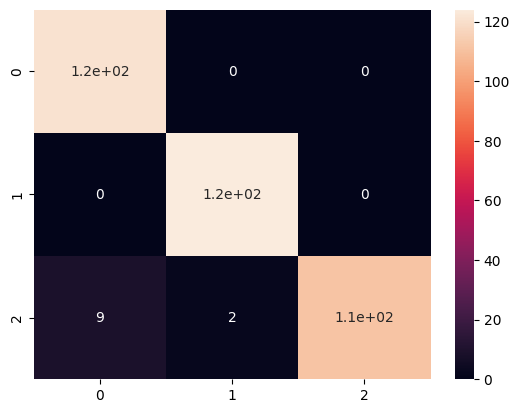

In [74]:
sns.heatmap(confusion_matrix(ytest,ypred1),annot=True)

In [75]:
import joblib

In [ ]:
joblib.dump